In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5.5
fig_height = 3.5
fig_format = :pdf
fig_dpi = 300

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using SymPy  # Para el cálculo simbólico de límites.
using Plots  # Para el dibujo de gráficas.
#plotlyjs() # Para obtener gráficos interactivos.
using LaTeXStrings  # Para usar código LaTeX en los gráficos.

In [3]:
x(n) = 2n + 1
print([x(n) for n = 1:10])

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [4]:
# Como reales
x(n) = 1 / n
print([x(n) for n = 1:10])
# Como racionales
x(n) = 1//n
print([x(n) for n = 1:10])

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1]

Rational{Int64}[1//1, 1//2, 1//3, 1//4, 1//5, 1//6, 1//7, 1//8, 1//9, 1//10]

In [5]:
x(n) = (-1)^n
print([x(n) for n = 1:10])

[-1, 1, -1, 1, -1, 1, -1, 1, -1, 1]

In [6]:
x(n) = (1 + 1 / n)^n
print([x(n) for n = 1:10])

[2.0, 2.25, 2.3703703703703702, 2.44140625, 2.4883199999999994, 2.5216263717421135, 2.546499697040712, 2.565784513950348, 2.581174791713198, 2.5937424601000023]

In [7]:
x(n) = n == 1 ? 1 : sqrt(1+x(n-1))
print([x(n) for n = 1:10])

Real[1, 1.4142135623730951, 1.5537739740300374, 1.5980531824786175, 1.6118477541252516, 1.616121206508117, 1.6174427985273905, 1.617851290609675, 1.6179775309347393, 1.6180165422314876]

In [8]:
using Plots
x(n) = n / (4n + 2)
scatter([x(n) for n = 1:50], legend=false)

In [9]:
using Plots
x(n) = 2^n / (4n + 2)
scatter([x(n) for n = 1:50], legend=false)

In [10]:
using Plots
x(n) = (-1)^n / n
scatter([x(n) for n = 1:50], legend=false)

In [11]:
using Plots
x(n) = (1 + 1 / n)^n
scatter([x(n) for n = 1:50], legend=false)

In [12]:
using Plots
x(n) =  n == 1 ? 0.5 : 3/(2+x(n-1))
scatter([x(n) for n = 1:50], legend=false)

In [13]:
using SymPy
@syms n::(integer, positive)  # Declaración de la variable simbólica n.
x(n) = 1/n
limit(x(n), n=>oo)

0

In [14]:
@syms n::(integer, positive)
x(n) = (-1)^n
limit(x(n), n=>oo)

nan

In [15]:
@syms n::(integer, positive)
x(n) = (1 + 1 / n)^n
limit(x(n), n=>oo)

ℯ

In [16]:
a(n) = n*sind(360/n)/2
print([a(10^i) for i = 1:6])

[2.938926261462366, 3.1395259764656687, 3.1415719827794755, 3.141592446881286, 3.141592651522708, 3.1415926535691225]

In [17]:
using Plots
a(n) = n*sind(360/n)/2
scatter([a(n) for n = 1:50], legend=false)

In [18]:
using SymPy
@syms n::(integer, positive)
a(n) = n*sin(2pi/n)/2
limit(a(n), n=>oo)

3.14159265358979

In [19]:
using SymPy
@syms n::(integer, positive), r
a(n) = n*r^2*sin(2pi/n)/2
limit(a(n), n=>oo)

                  2
3.14159265358979⋅r 

In [20]:
using Plots
x(n) =  n == 1 ? 1 : 1 + 1 / x(n-1)
scatter([x(n) for n = 1:10], legend=false)

In [21]:
using Plots, LaTeXStrings
x(n) =  n == 1 ? 1 : 1 + 1 / x(n-1)
n1 = 1:2:10
n2 = 2:2:10
scatter(n1, x.(n1), label=L"$x_{2n-1}$")
scatter!(n2, x.(n2), label=L"$x_{2n}$")

In [22]:
#| echo: false
using QuizQuestions
nothing

In [23]:
#| echo: false
x(n)=(3n^2+n)/(6n^2-1)
numericq(x(10), 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(0.5175292153589316, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [24]:
#| echo: false
choices = ("0", "0.5", "1", "1.5", "No converge")
answer = 2
radioq(choices, answer)

QuizQuestions.Radioq(("0.5", "1.5", "0", "No converge", "1"), 1, [1, 2, 3, 4, 5], ("0.5", "1.5", "0", "No converge", "1"), "", "", "", false)

QuizQuestions.HotspotQ("img/sucesiones/graficas-sucesiones.png", (0, 0.5), (0, 0.5), "", "", "", nothing)
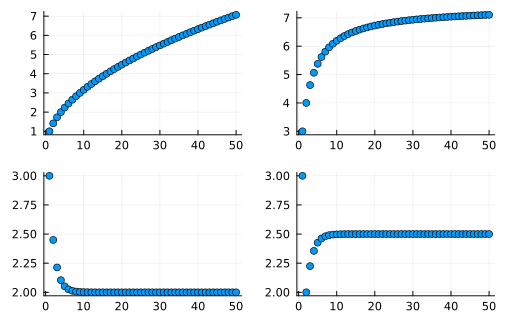

In [25]:
#| echo: false
using Plots
x(n) = n==1 ? 3 : sqrt(2x(n-1))
y(n) = n==1 ? 3 : 1 + 3/x(n-1)
p1 = scatter([sqrt(n) for n=1:50], legend=false)
p2 = scatter([(1+2/n)^n for n=1:50], legend=false)
p3 = scatter([x(n) for n=1:50], legend=false)
p4 = scatter([y(n) for n=1:50], legend=false)
l = @layout [a b; c d]
p = plot(p1, p2, p3, p4, layout=l)
imgfile = "img/sucesiones/graficas-sucesiones.png"
savefig(p, imgfile)
hotspotq(imgfile, (0,1/2), (0, 1/2))

In [26]:
#| echo: false
yesnoq("yes")

QuizQuestions.Radioq(["Si", "No"], 1, [1, 2], ["Si", "No"], "", "", "", false)

In [27]:
#| echo: false
yesnoq("no")

QuizQuestions.Radioq(["Si", "No"], 2, [1, 2], ["Si", "No"], "", "", "", false)

In [28]:
#| echo: false
yesnoq("yes")

QuizQuestions.Radioq(["Si", "No"], 1, [1, 2], ["Si", "No"], "", "", "", false)

In [29]:
#| echo: false
numericq(exp(2), 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(7.38905609893065, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)